In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  prova3ranks


Current folders are:
prova3ranks.0
prova3ranks.1
prova3ranks.2


In [2]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_"]

In [3]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2
0,64.233110,293.150559,129.487578
1,117.701811,379.850077,136.888572
2,182.364363,409.802010,135.862338
3,241.612347,489.289289,124.005408
4,278.116973,493.107076,94.527207
...,...,...,...
95,376.351619,784.714292,73.962966
96,384.978264,751.825308,84.964180
97,369.927990,659.450653,96.717500
98,318.262893,658.988002,98.014935


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2
0,129.0,522.0,254.10
1,264.0,801.6,273.00
2,361.5,746.4,286.65
3,484.5,904.8,243.60
4,550.5,988.8,202.65
...,...,...,...
95,751.5,1422.0,154.35
96,814.5,1380.0,177.45
97,792.0,1206.0,223.65
98,708.0,1251.6,195.30


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2
0,11037.613965,14364.744183,2408.770973
1,10825.068034,13981.764015,2371.378814
2,10650.560617,13934.301765,2339.365072
3,10451.087974,13673.952447,2364.178856
4,10309.146391,13488.711110,2387.019281
...,...,...,...
95,37251.655386,11298.405690,1226.642080
96,38083.833963,11252.069539,1194.840633
97,39727.024819,11575.078581,1142.830435
98,39529.642702,11440.721091,1161.690988


'____________________________________________________________'

'_total_inventories_'

,0,1,2
0,0.0,0.0,242.55
1,0.0,386.4,499.80
2,0.0,841.2,751.80
3,0.0,1778.4,988.05
4,105.0,2452.8,1165.50
...,...,...,...
95,55987.5,108374.4,17244.15
96,56592.0,109789.2,17410.05
97,57583.5,110978.4,17600.10
98,58029.0,112365.6,17788.05


'____________________________________________________________'

'_total_in_progress_inventories_'

,0,1,2
0,129.0,522.0,0.0
1,336.0,740.4,0.0
2,697.5,1018.8,0.0
3,1159.5,943.2,0.0
4,1599.0,1017.6,0.0
...,...,...,...
95,2688.0,1362.0,0.0
96,2706.0,1209.6,0.0
97,2305.5,1189.2,0.0
98,2425.5,955.2,0.0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2
0,0.000000,0.000000,6.226698
1,28.193138,111.164192,8.401766
2,0.000000,5.400408,18.877059
3,9.771781,24.437063,3.862259
4,1.975929,132.222004,13.618688
...,...,...,...
95,0.000000,37.674409,4.195542
96,91.895574,64.337009,6.273275
97,100.402563,19.383355,17.148150
98,70.280067,55.146162,3.928003


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2
0,0.0,0.0,11.55
1,57.0,196.8,15.75
2,0.0,13.2,34.65
3,22.5,43.2,7.35
4,6.0,240.0,25.20
...,...,...,...
95,0.0,69.6,7.35
96,192.0,117.6,11.55
97,201.0,37.2,33.60
98,142.5,98.4,7.35


'____________________________________________________________'

'_updatedLabor_'

,0,1,2
0,603.0,1091.0,642.0
1,603.0,1091.0,642.0
2,603.0,1091.0,642.0
3,603.0,1091.0,642.0
4,603.0,1091.0,642.0
...,...,...,...
95,4413.0,3209.0,565.0
96,4483.0,3245.0,570.0
97,4483.0,3245.0,570.0
98,4483.0,3245.0,571.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2
0,5544.534017,7391.682007,1322.189407
1,5506.030309,7340.350882,1313.007536
2,5467.793987,7289.376223,1303.889428
3,5429.823196,7238.755555,1294.834640
4,5392.116090,7188.486419,1285.842733
...,...,...,...
95,19449.166981,6316.034770,686.145316
96,20259.512410,6390.539291,683.240218
97,20118.821351,6346.160546,678.495494
98,19979.107314,6303.521009,673.783720


'____________________________________________________________'

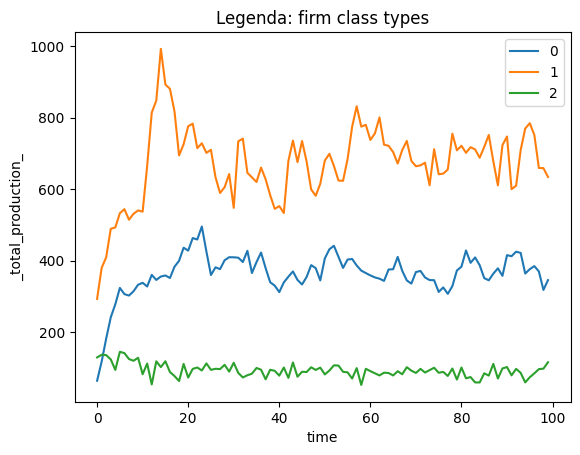

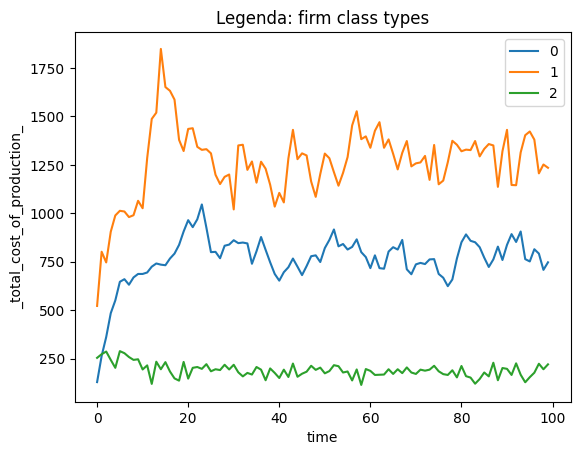

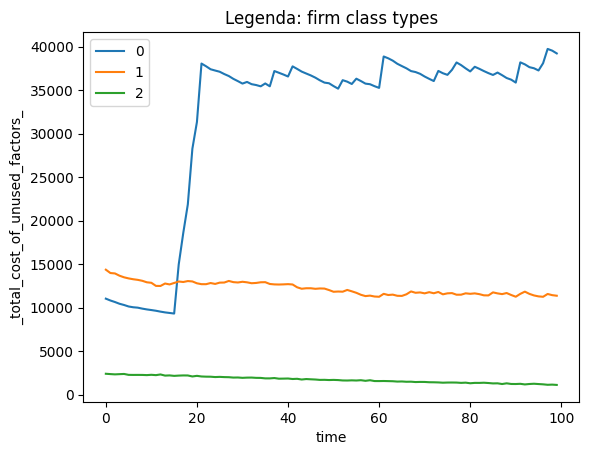

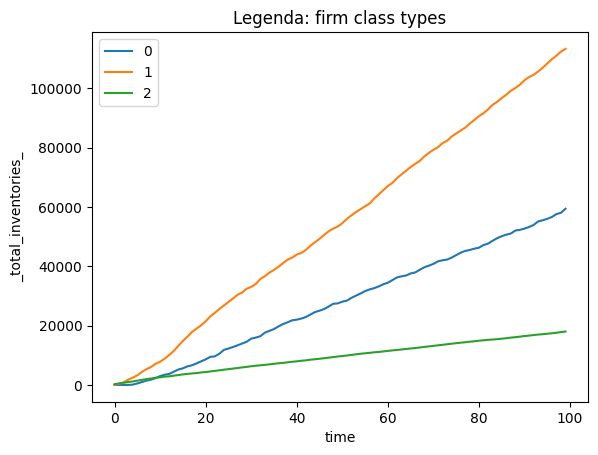

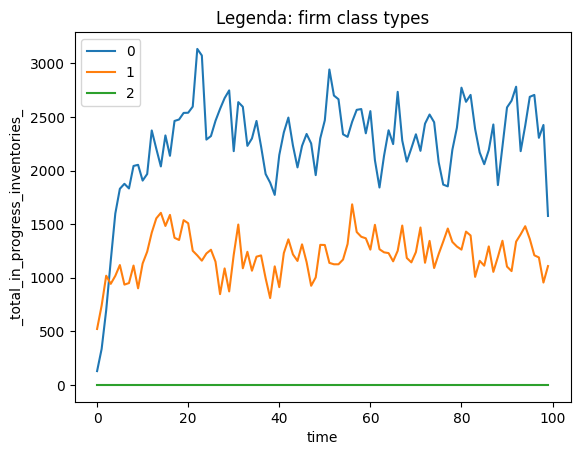

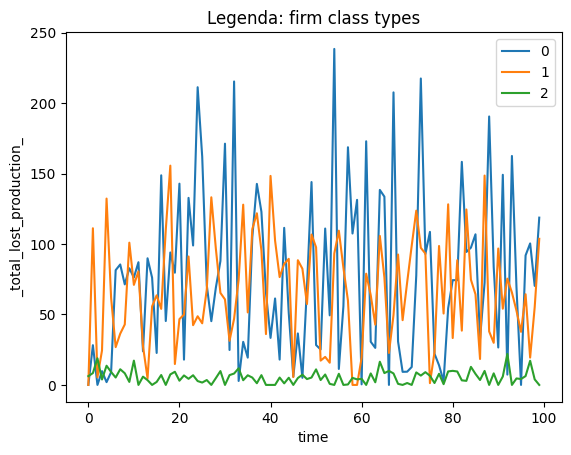

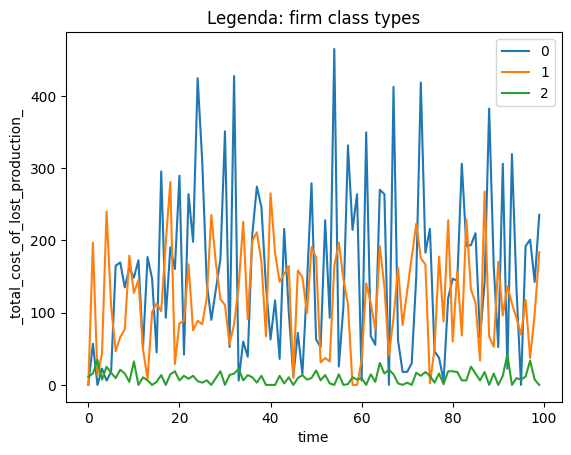

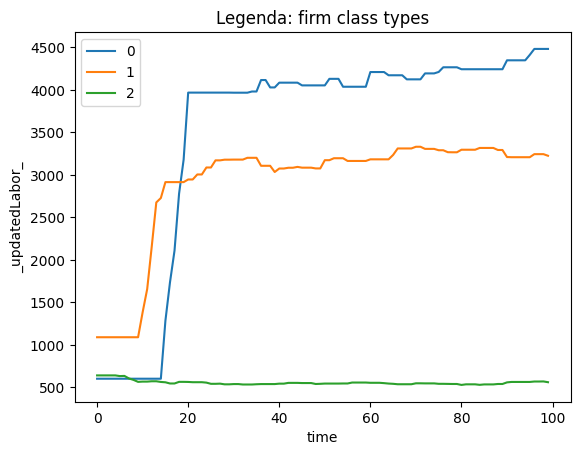

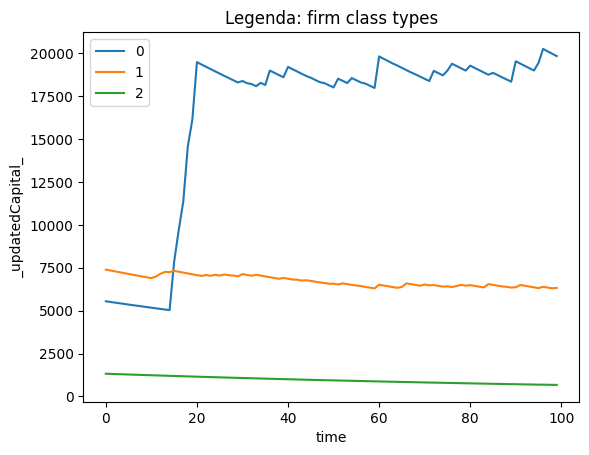

In [4]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)